# Sorting Algorithms

In [1]:
import random
import time
from typing import List, Callable, Generator
from datetime import date, timedelta

In [2]:
def quick_sort(arr: List[str]) -> List[str]:
    """Sort a list of date strings in ISO format (YYYY-MM-DD) using quick sort."""
    a = arr.copy()

    def _quick_sort(lo, hi):
        if lo < hi:
            p = partition(lo, hi)
            _quick_sort(lo, p - 1)
            _quick_sort(p + 1, hi)

    def partition(lo, hi):
        pivot = a[hi]
        i = lo
        for j in range(lo, hi):
            if a[j] <= pivot:
                a[i], a[j] = a[j], a[i]
                i += 1
        a[i], a[hi] = a[hi], a[i]
        return i

    _quick_sort(0, len(a) - 1)
    return a
def heap_sort(arr: List[str]) -> List[str]:
    """Sort a list of date strings in ISO format (YYYY-MM-DD) using heap sort."""
    a = arr.copy()
    n = len(a)

    def heapify(size, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2

        if left < size and a[left] > a[largest]:
            largest = left
        if right < size and a[right] > a[largest]:
            largest = right
        if largest != i:
            a[i], a[largest] = a[largest], a[i]
            heapify(size, largest)

    # Build max heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(n, i)

    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        a[i], a[0] = a[0], a[i]
        heapify(i, 0)

    return a
def bubble_sort(arr: List[str]) -> List[str]:
    """Sort a list of date strings in ISO format (YYYY-MM-DD) using bubble sort."""
    a = arr.copy()
    n = len(a)
    for i in range(n):
        for j in range(0, n - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
    return a

def insertion_sort(arr: List[str]) -> List[str]:
    """Sort a list of date strings in ISO format (YYYY-MM-DD) using insertion sort."""
    a = arr.copy()
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key
    return a

def merge_sort(arr: List[str]) -> List[str]:
    """Sort a list of date strings in ISO format (YYYY-MM-DD) using merge sort."""
    if len(arr) <= 1:
        return arr.copy()

    # Split list in half
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])

    # Merge halves
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def sort_list(arr: list, algorithm="bubble"):
    """Sort a list of date strings in ISO format using the specified algorithm."""
    if algorithm == "bubble":
        return bubble_sort(arr)

    elif algorithm == "insertion":
        return insertion_sort(arr)

    elif algorithm == "merge":
        return merge_sort(arr)

    elif algorithm == "quick":
        return quick_sort(arr)

    elif algorithm == "heap":
        return heap_sort(arr)


# Permutation generation

In [3]:
def generate_permutation(dates: List[str]) -> List[str]:
    """Return a random permutation of the input list of date strings."""
    perm = dates.copy()
    random.shuffle(perm)
    return perm


In [4]:
import random

def all_permutations_sjt(dates: List[str]) -> List[List[str]]:
    """
    Generate all permutations of the input list of date strings using Steinhaus–Johnson–Trotter (adjacent-swap) order.
    Returns a list of lists (each inner list is one permutation).
    """
    n = len(dates)
    perm = dates.copy()
    dirs = [-1] * n
    result = [perm.copy()]

    while True:
        # 1) Find all “mobile” indices: i such that 0 <= i+dirs[i] < n and perm[i] > perm[i+dirs[i]]
        mobile = [i for i in range(n)
                  if 0 <= i + dirs[i] < n and perm[i] > perm[i + dirs[i]]]
        if not mobile:
            break

        # 2) Pick the mobile index whose element is largest (latest date)
        i_max = max(mobile, key=lambda i: perm[i])
        d = dirs[i_max]

        # 3) Swap that element with its neighbor in direction d
        perm[i_max], perm[i_max + d] = perm[i_max + d], perm[i_max]
        dirs[i_max], dirs[i_max + d] = dirs[i_max + d], dirs[i_max]
        new_index = i_max + d  # the index of our “largest mobile” after swapping

        # 4) Reverse direction of all elements larger than perm[new_index]
        for j in range(n):
            if perm[j] > perm[new_index]:
                dirs[j] *= -1

        result.append(perm.copy())

    return result

dates_example = ["2024-01-01", "2024-02-01", "2024-03-01"]

def random_permutation_from_sjt_pool(pool):
    return random.choice(pool)

dates_example = ["2024-01-01", "2024-02-01", "2024-03-01"]
all_perms = all_permutations_sjt(dates_example)
print(len(all_perms)) # Should be 6 for 3 dates
print(all_perms)


6
[['2024-01-01', '2024-02-01', '2024-03-01'], ['2024-01-01', '2024-03-01', '2024-02-01'], ['2024-03-01', '2024-01-01', '2024-02-01'], ['2024-03-01', '2024-02-01', '2024-01-01'], ['2024-02-01', '2024-03-01', '2024-01-01'], ['2024-02-01', '2024-01-01', '2024-03-01']]


In [5]:
def test_algorithm(n=100):
    # Generate a list of n consecutive date strings starting from a random date
    random_days = random.randint(0, 365 * 50)  # up to 50 years in the past
    base_date = date.today() - timedelta(days=random_days)
    date_list = [(base_date + timedelta(days=i)).isoformat() for i in range(n)]
    perm = generate_permutation(date_list)
    print(f"Original list: {perm}\n")

    algorithms = ["bubble", "insertion", "merge", "quick", "heap"]

    for alg in algorithms:
        start = time.perf_counter()
        result = sort_list(perm, alg)
        elapsed = time.perf_counter() - start
        print(f"{alg} sort")
        print(f"Time: {elapsed:.6f} seconds\n")
# Test our sorting algorithms
test_algorithm(1000)

Original list: ['2007-07-31', '2007-11-23', '2008-05-20', '2009-07-18', '2009-02-13', '2009-11-14', '2008-01-08', '2008-06-22', '2009-08-24', '2010-02-04', '2008-07-25', '2008-06-11', '2009-12-07', '2008-05-02', '2007-07-19', '2008-10-28', '2009-03-28', '2009-05-16', '2009-09-05', '2007-12-16', '2009-11-30', '2009-11-06', '2008-08-17', '2009-08-18', '2008-09-16', '2009-04-15', '2008-10-10', '2007-08-03', '2009-12-12', '2009-07-28', '2008-06-24', '2009-01-08', '2008-01-10', '2007-10-05', '2008-03-26', '2009-05-04', '2008-12-01', '2007-12-10', '2008-03-22', '2009-06-15', '2008-01-09', '2007-12-26', '2010-01-28', '2009-09-15', '2008-02-17', '2008-03-25', '2009-08-29', '2008-12-23', '2009-10-31', '2010-01-27', '2009-06-19', '2010-02-25', '2009-10-15', '2009-01-06', '2009-10-03', '2009-10-10', '2008-07-23', '2009-05-12', '2007-07-10', '2009-04-26', '2009-07-04', '2007-07-09', '2009-02-21', '2008-08-01', '2008-03-23', '2008-09-14', '2008-10-21', '2008-06-23', '2010-01-04', '2008-07-31', '200

# Memory Usage Comparison of Sorting Algorithms

Bubble sort peak memory: 9295 bytes
Insertion sort peak memory: 11352 bytes
Merge sort peak memory: 18606 bytes
Quick sort peak memory: 9616 bytes
Heap sort peak memory: 8564 bytes


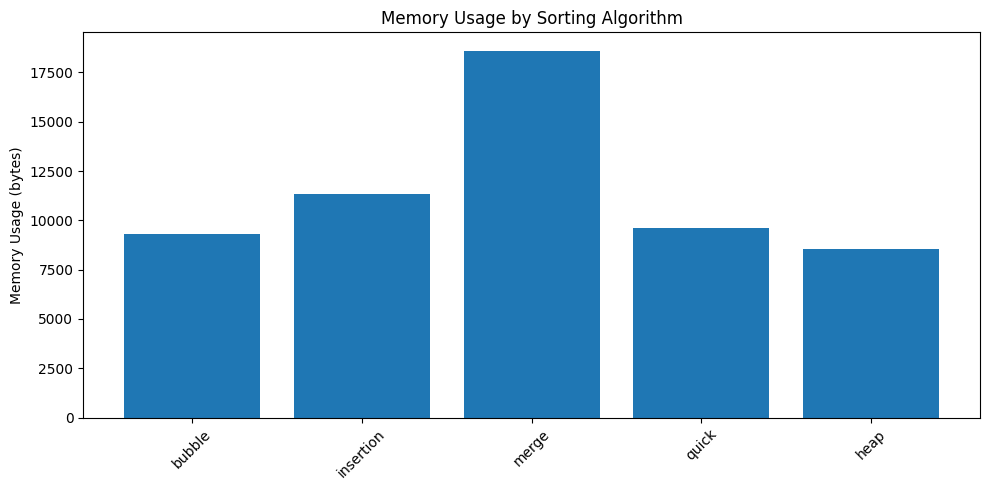

In [6]:
import tracemalloc
import random
from typing import Callable, Dict

def measure_peak_memory(func: Callable, input_data: list) -> float:
    """
    Runs func(input_data) and returns the peak memory (in bytes) that
    tracemalloc saw during its execution.
    """
    # Make sure to start with a clean slate
    tracemalloc.start()

    # Run the function (we'll track peak memory while it runs)
    func(input_data)

    # get_traced_memory() returns (current, peak)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak

def compare_memory_usage(n: int = 1000) -> Dict[str, float]:
    # Generate one random test array
    base = list(range(1, n + 1))
    random.shuffle(base)

    algorithms = {
        'bubble': bubble_sort,
        'insertion': insertion_sort,
        'merge': merge_sort,
        'quick': quick_sort,
        'heap': heap_sort
    }

    results = {}
    for name, func in algorithms.items():
        data_copy = base.copy()

        peak = measure_peak_memory(func, data_copy)
        results[name] = peak
        print(f"{name.capitalize()} sort peak memory: {peak} bytes")

    return results
results = compare_memory_usage()


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title('Memory Usage by Sorting Algorithm')
plt.ylabel('Memory Usage (bytes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Performance Comparison on Different Input Sizes and Structures


In [7]:
import matplotlib.pyplot as plt
import numpy as np

def compare_algorithms(sizes, runs=100):
    results = {}
    # Generate different test cases with date strings
    test_cases = {
        "random": lambda n, base_date: generate_permutation([(base_date + timedelta(days=i)).isoformat() for i in range(n)]),
        "sorted": lambda n, base_date: [(base_date + timedelta(days=i)).isoformat() for i in range(n)],
        "reversed": lambda n, base_date: [(base_date + timedelta(days=i)).isoformat() for i in range(n-1, -1, -1)]
    }

    for size in sizes:
        print(f"Testing with size = {size}")
        results[size] = {}

        for case_name, generator in test_cases.items():
            print(f"  Case: {case_name}")
            # Store total times for averaging
            alg_totals = {alg: 0.0 for alg in ["bubble", "insertion", "merge", "quick", "heap"]}
            for run in range(runs):
                random_days = random.randint(0, 365 * 50)  # up to 50 years in the past
                base_date = date.today() - timedelta(days=random_days)
                data = generator(size, base_date)
                for alg in alg_totals:
                    start = time.perf_counter()
                    sort_list(data, alg)
                    elapsed = time.perf_counter() - start
                    alg_totals[alg] += elapsed
            # Average over runs
            results[size][case_name] = {alg: alg_totals[alg] / runs for alg in alg_totals}
            for alg in alg_totals:
                print(f"    {alg}: {results[size][case_name][alg]:.6f} seconds (average over {runs} runs)")
    return results


Testing with size = 10
  Case: random
    bubble: 0.000007 seconds (average over 100 runs)
    insertion: 0.000004 seconds (average over 100 runs)
    merge: 0.000013 seconds (average over 100 runs)
    quick: 0.000008 seconds (average over 100 runs)
    heap: 0.000010 seconds (average over 100 runs)
  Case: sorted
    bubble: 0.000007 seconds (average over 100 runs)
    insertion: 0.000002 seconds (average over 100 runs)
    merge: 0.000015 seconds (average over 100 runs)
    quick: 0.000013 seconds (average over 100 runs)
    heap: 0.000011 seconds (average over 100 runs)
  Case: reversed
    bubble: 0.000008 seconds (average over 100 runs)
    insertion: 0.000006 seconds (average over 100 runs)
    merge: 0.000011 seconds (average over 100 runs)
    quick: 0.000010 seconds (average over 100 runs)
    heap: 0.000008 seconds (average over 100 runs)
Testing with size = 20
  Case: random
    bubble: 0.000023 seconds (average over 100 runs)
    insertion: 0.000013 seconds (average over 1

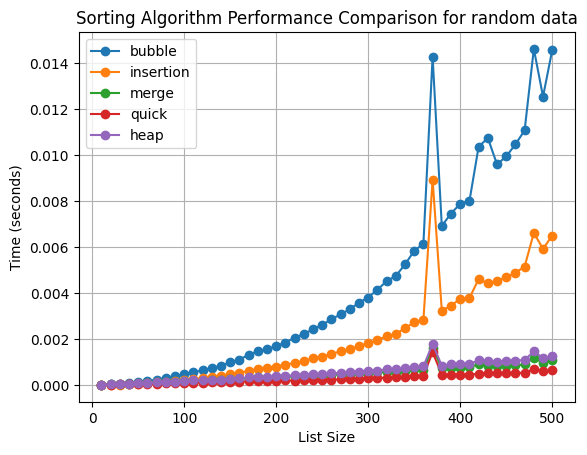

In [8]:

sizes = [i for i in range(10, 501, 10)]
results = compare_algorithms(sizes)

for alg in ["bubble", "insertion", "merge", "quick", "heap"]:
    times = [results[size]["random"][alg] for size in sizes]
    plt.plot(sizes, times, marker='o', label=alg)

plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Performance Comparison for random data')
plt.legend()
plt.grid(True)
plt.show()


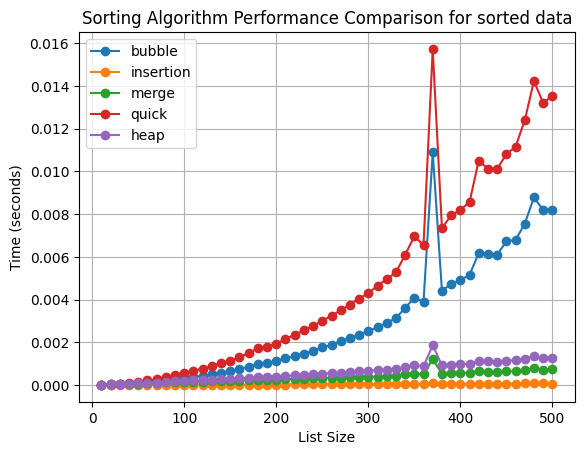

In [9]:
for alg in ["bubble", "insertion", "merge", "quick", "heap"]:
    times = [results[size]["sorted"][alg] for size in sizes]
    plt.plot(sizes, times, marker='o', label=alg)

plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Performance Comparison for sorted data')
plt.legend()
plt.grid(True)
plt.show()


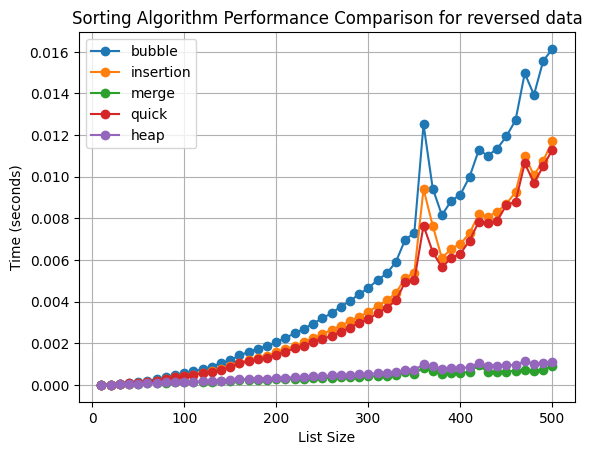

In [10]:
for alg in ["bubble", "insertion", "merge", "quick", "heap"]:
    times = [results[size]["reversed"][alg] for size in sizes]
    plt.plot(sizes, times, marker='o', label=alg)

plt.xlabel('List Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Performance Comparison for reversed data')
plt.legend()
plt.grid(True)
plt.show()


## Summary

- Bubble sort and insertion sort are simpler but slower (O(n²))
- Merge sort, quick sort, and heap sort are faster (O(n log n))
- Merge sort performs stable on all inputs but Merge Sort may require additional space
- Quick sort can have problems with already sorted lists
- Different algorithms perform better on different types of input
